# Alzheimer's Disease Risk Prediction - EU Business

Last modification: 23/09/2025

@misc{alzheimers-disease-risk-prediction-eu-business,
    author = {Hachem SFAR},
    title = {Alzheimer's Disease Risk Prediction - EU Business},
    year = {2025},
    howpublished = {\url{https://kaggle.com/competitions/alzheimers-disease-risk-prediction-eu-business}},
    note = {Kaggle}
}

## IMPORT THE DATA




In [74]:
from pathlib import Path
import zipfile

# folder
data_path = Path("/content/kaggle/Alzheimers")

# Create just in case

if data_path.is_dir():
    print(f"{data_path} directory exists.")
else:
    print(f"Did not find {data_path} directory, creating...")
    data_path.mkdir(parents=True, exist_ok=True)

    # Install kaggle
    !pip install kaggle --quiet

    # token
    from google.colab import files
    files.upload()  #kaggle.json
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

    # Download data
    !kaggle competitions download -c alzheimers-disease-risk-prediction-eu-business -p /content/kaggle/Alzheimers

    # unzip
    zip_file = data_path / "alzheimers-disease-risk-prediction-eu-business.zip"
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(data_path)

    print("Downloaded:", list(data_path.iterdir()))

/content/kaggle/Alzheimers directory exists.


## OPEN THE DATA

In [75]:
import pandas as pd

train = pd.read_csv(data_path / "train.csv")
test  = pd.read_csv(data_path / "test.csv")

X_train = train.drop(["Diagnosis", "DoctorInCharge", "PatientID"], axis = 1) #No sense to use doctor and patient ID
y_train = train["Diagnosis"]

## SOME BASIC DATA EXPLORATION:

MISSING VALUES

We see that all the data is completed

In [76]:
print(f"Train missing values: {train.isna().sum()}")
print(f"Test missing values: {test.isna().sum()}")

Train missing values: PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyComplet

SEARCH IF EVERYTHING IS IN NUMERIC

*Everything is numerical data*

In [77]:
print(f"Train data types: {X_train.dtypes}")

Train data types: Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                 

CORRELATION BETWEEN VARIABLES:

*It seems that there is no correlated variables between them*

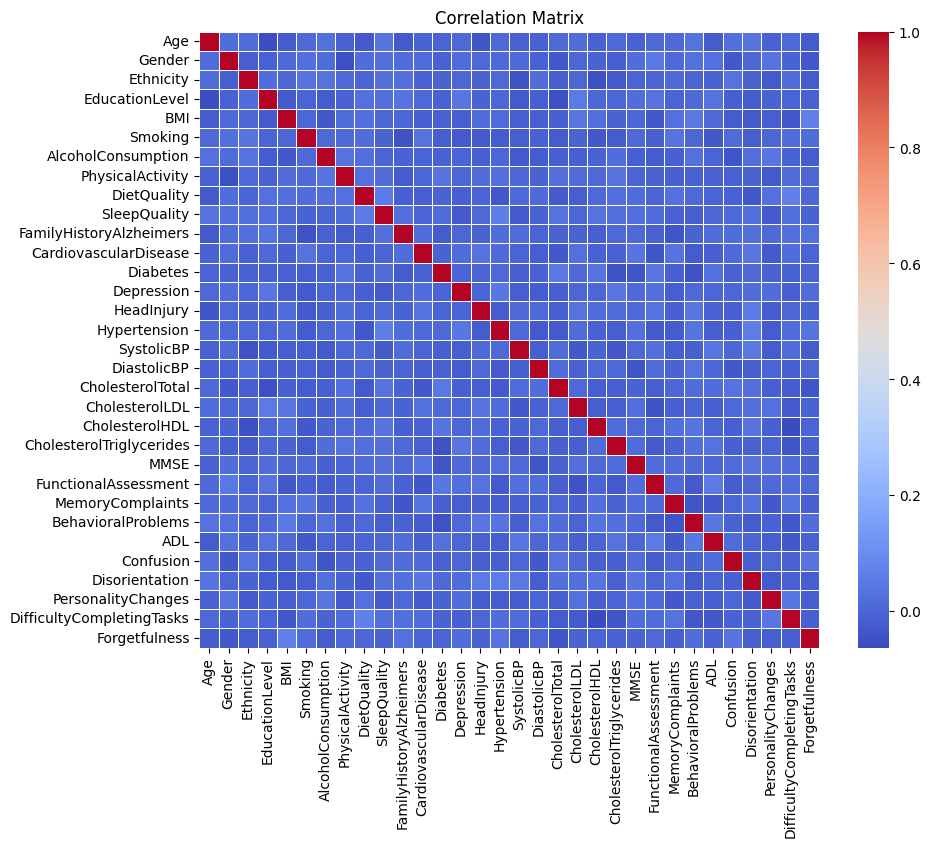

In [78]:
# We will only work through the train set excluding the target variable (diagnosis)

correlation_matrix = X_train.corr()

# Plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation with diagnosis

*It seems that there is no correlation between target and the others variables, which is unusual because for example is well-known thtat age is a long-term risk factor, maybe it's because that Pearson correlation can not modulate this effect so maybe it's better to use mutual information method*

In [79]:
diagnosis_correlation = X_train.corrwith(y_train)

print(f"Correlation with diagnosis {diagnosis_correlation} ")

Correlation with diagnosis Age                         -0.013027
Gender                      -0.006516
Ethnicity                   -0.007018
EducationLevel              -0.053807
BMI                          0.020506
Smoking                     -0.008301
AlcoholConsumption           0.001522
PhysicalActivity            -0.019473
DietQuality                  0.022202
SleepQuality                -0.045426
FamilyHistoryAlzheimers     -0.029490
CardiovascularDisease        0.023574
Diabetes                    -0.014386
Depression                   0.008818
HeadInjury                  -0.021888
Hypertension                 0.025346
SystolicBP                  -0.031636
DiastolicBP                  0.029756
CholesterolTotal            -0.001294
CholesterolLDL              -0.011251
CholesterolHDL               0.045888
CholesterolTriglycerides     0.029232
MMSE                        -0.224627
FunctionalAssessment        -0.377913
MemoryComplaints             0.297981
BehavioralProblems     

Mutual information

*If we take a look at the top 5 with more MI, now everything makes a little bit more sense because are measurements that are directly saying the cognitive level of the patient. But still low values*

In [80]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train, discrete_features=False)
mi_series = pd.Series(mi, index=X_train.columns)
mi_series = mi_series.sort_values(ascending=False)

print("Top 10 variables mutual information:")
print(mi_series.head(10))

Top 10 variables mutual information:
FunctionalAssessment    0.104133
MMSE                    0.083794
ADL                     0.078708
MemoryComplaints        0.040836
AlcoholConsumption      0.020017
PersonalityChanges      0.018566
HeadInjury              0.015748
PhysicalActivity        0.010337
DietQuality             0.010148
SystolicBP              0.010065
dtype: float64


SEARCH IF THE TRAIN TARGET IS BALANCED

*We see that there is more people without alzheimer than people with alzheimer so it's not balanced at all (more or less the relation is 2:1)*

In [81]:
print(f"Train diagnosis: {y_train.value_counts()}")

Train diagnosis: Diagnosis
0    1112
1     607
Name: count, dtype: int64


## PREPROCESSING

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split in a stratified version

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

#Scale

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL CREATION

We are going to start from basic models and depending of the results we will use better models, according to the competition we need to use the F1 score as a evaluation metric.
Also, I will be using bootstrap because we want a stable model results

*According to the RSF model, it seems that we don't need high complex models (not use of deepLearing) because we can predict really well with a easy model*

### Some functions

In [83]:
def predictionResults(y_true, y_pred, train_or_test = 'Unknown'):
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

  print("------------------")
  accuracy = round(accuracy_score(y_true, y_pred),3)
  precision = round(precision_score(y_true, y_pred),3)
  recall = round(recall_score(y_true, y_pred),3)
  f1 = round(f1_score(y_true, y_pred),3)

  print(f"Evaluating {train_or_test} set")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("------------------")

Hiperparameter function

In [84]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, accuracy_score, get_scorer
from sklearn.base import is_classifier, is_regressor

def tune_model_bayes(model, search_space, X_train, y_train, X_test, y_test,
                     cv=5, n_iter=20, scoring='accuracy', random_state=42, verbose=True):
    """
    Tune hyperparameters of a sklearn model using Bayesian Optimization (skopt).

    Args:
        model: sklearn estimator
        search_space: dict of hyperparameter ranges
        X_train, y_train: training data
        X_test, y_test: test data
        cv: cross-validation folds
        n_iter: number of iterations
        scoring: str or callable metric
        random_state: reproducibility
        verbose: print progress and ETA

    Returns:
        best_model: trained model with best hyperparameters
    """

    # Detect task
    if is_classifier(model):
        task = "classification"
    elif is_regressor(model):
        task = "regression"
    else:
        raise ValueError("Unknown model type. Must be classifier or regressor.")

    if verbose:
        print(f"Detected task: {task}")

    # Handle scoring
    try:
        scorer = get_scorer(scoring)
    except:
        scorer = make_scorer(scoring)

    # Setup optimizer
    opt = BayesSearchCV(
        estimator=model,
        search_spaces=search_space,
        n_iter=n_iter,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=random_state,
        verbose=0
    )

    # Fit
    opt.fit(X_train, y_train)

    # Best model
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_test)

    if is_classifier(model):
        print("Test accuracy:", accuracy_score(y_test, y_pred))
    else:
        from sklearn.metrics import r2_score
        print("Test R^2:", r2_score(y_test, y_pred))

    print("Best parameters:", opt.best_params_)

    return best_model

### RANDOM FOREST

*The first model is a basic model, then we will do a better RF*

In [85]:
# Random forest basic implementation

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

rf_model.predict(X_test)

y_pred = rf_model.predict(X_test)

predictionResults(y_test, y_pred, 'Train')

------------------
Evaluating Train set
Accuracy: 0.904
Precision: 0.9
Recall: 0.818
F1 Score: 0.857
------------------


In [86]:
# Dictionary of the params that we are going to use

rf = RandomForestClassifier(random_state=42)

search_space = {
    'n_estimators': (50, 100,200),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': ['sqrt', 'log2', None],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

best_rf = tune_model_bayes(rf, search_space, X_train, y_train, X_test, y_test,
                           n_iter=15, scoring='f1')


Detected task: classification
Test accuracy: 0.936046511627907
Best parameters: OrderedDict({'criterion': 'log_loss', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50})


In [87]:
# Just show the final results with the best model

predictionResults(y_test, best_rf.predict(X_test), 'Test')

predictionResults(y_train, best_rf.predict(X_train), 'Train')

------------------
Evaluating Test set
Accuracy: 0.936
Precision: 0.896
Recall: 0.926
F1 Score: 0.911
------------------
------------------
Evaluating Train set
Accuracy: 0.975
Precision: 0.977
Recall: 0.953
F1 Score: 0.965
------------------


### SVM

In [88]:
from sklearn import svm

svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_model.predict(X_test)

y_pred = svm_model.predict(X_test)

predictionResults(y_test, y_pred, 'test')

------------------
Evaluating test set
Accuracy: 0.811
Precision: 0.746
Recall: 0.702
F1 Score: 0.723
------------------


In [89]:
# Now we are going to perform a better SVM using our grid search

svm_model = svm.SVC(random_state=42)

from skopt.space import Categorical, Real, Integer

search_space = {
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'degree': Integer(2, 5),
    'coef0': Real(0.0, 1.0)
}

best_svm = tune_model_bayes(svm_model, search_space, X_train, y_train, X_test, y_test,
                           n_iter=15, scoring='f1')

Detected task: classification
Test accuracy: 0.811046511627907
Best parameters: OrderedDict({'C': 0.46665408703686484, 'coef0': 0.9187225216693771, 'degree': 2, 'gamma': 0.014677902866332837, 'kernel': 'linear'})


### XGBOOST

In [90]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

predictionResults(y_test, y_pred, 'test')

------------------
Evaluating test set
Accuracy: 0.936
Precision: 0.902
Recall: 0.917
F1 Score: 0.91
------------------


In [91]:
# Now let's do a grid search for the best hiperparamters

xgb_model = xgb.XGBClassifier(random_state=42)

search_space = {
    'n_estimators': (10, 500),
    'max_depth': (1, 20),
    'learning_rate': (0.01, 0.1),
    'booster': Categorical(['gbtree', 'gblinear', 'dart']),
    'eta':(0,1),
    'gamma': (0,10),
    'tree_method': Categorical(['auto', 'exact', 'approx', 'hist'])
}

best_xgb = tune_model_bayes(xgb_model, search_space, X_train, y_train, X_test, y_test,
                           n_iter=15, scoring='f1')


Detected task: classification
Test accuracy: 0.936046511627907
Best parameters: OrderedDict({'booster': 'dart', 'eta': 0, 'gamma': 5, 'learning_rate': 0.07441419358963297, 'max_depth': 18, 'n_estimators': 361, 'tree_method': 'exact'})


In [92]:
predictionResults(y_test, best_xgb.predict(X_test), 'Test')

predictionResults(y_train, best_xgb.predict(X_train), 'Train')

------------------
Evaluating Test set
Accuracy: 0.936
Precision: 0.896
Recall: 0.926
F1 Score: 0.911
------------------
------------------
Evaluating Train set
Accuracy: 0.961
Precision: 0.96
Recall: 0.928
F1 Score: 0.944
------------------


# CHOOSING THE BEST MODEL

**Random forest results**
```
Evaluating Test set
Accuracy: 0.936
Precision: 0.896
Recall: 0.926
F1 Score: 0.911
------------------
Evaluating Train set
Accuracy: 0.975
Precision: 0.977
Recall: 0.953
F1 Score: 0.965
```
**XGBOOST results:**
```
Evaluating Test set
Accuracy: 0.936
Precision: 0.896
Recall: 0.926
F1 Score: 0.911
------------------
Evaluating Train set
Accuracy: 0.961
Precision: 0.96
Recall: 0.928
F1 Score: 0.944
```

Comparing the two best models we can see that during the test they have exactly the same result but taking a look at the training set, random forest is much better, however there is one problem, maybe it's overfit so we will finish the competition using the xgboost model

# Feature importance

In this part, we will see the importance of each variable, in this way we can see where to focuss as a clinician

*Some of the most important features are also the ones with best mutual information with the target variable*

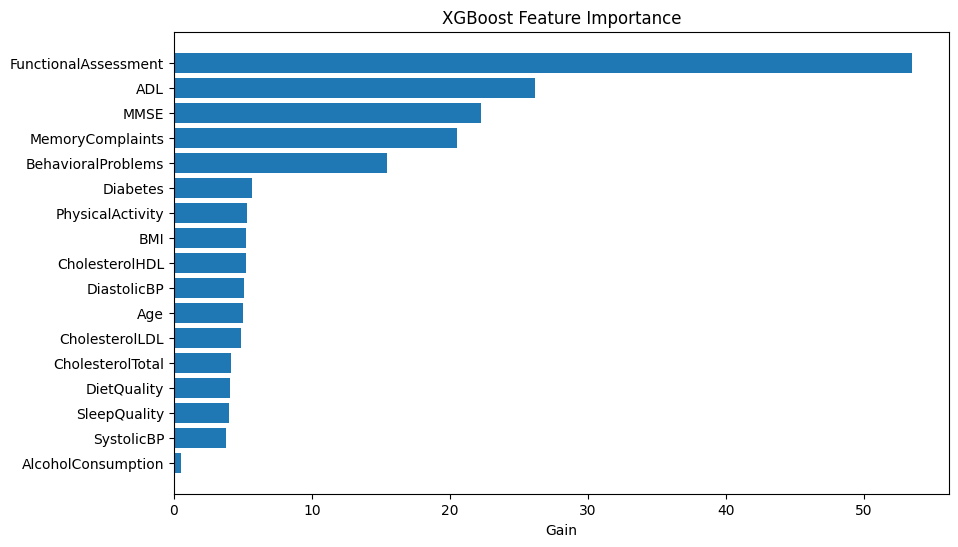

In [95]:
feature_names = train.columns.drop(["Diagnosis", "DoctorInCharge", "PatientID"])

import matplotlib.pyplot as plt

booster = best_xgb.get_booster()
importance = booster.get_score(importance_type='gain')

importance_named = {feature_names[int(k[1:])]: v for k, v in importance.items()}

importance_named = dict(sorted(importance_named.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,6))
plt.barh(list(importance_named.keys())[::-1], list(importance_named.values())[::-1])
plt.xlabel("Gain")
plt.title("XGBoost Feature Importance")
plt.show()



# Results for Kaggle competition:


In [99]:
# Get the final predictions

ID = test["PatientID"].copy()

 # Using the same columns as X_train

test_features = test[feature_names]

test_scaled = scaler.transform(test_features)

# --- Predictions ---
predictions = best_xgb.predict(test_scaled)

# --- submission ---
submission = pd.DataFrame({
    "PatientID": ID,
    "Diagnosis": predictions
})

# CSV
path = data_path / "submission.csv"

submission.to_csv(path, index=False)

# Mostrar ejemplos
print(submission.head())
print(submission.tail())


   PatientID  Diagnosis
0       5910          0
1       6573          0
2       5729          0
3       5510          0
4       5625          0
     PatientID  Diagnosis
425       5854          0
426       6742          0
427       5196          1
428       5299          0
429       4776          0
